In [1]:
import os
import numpy as np
from keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from keras.models import load_model
import numpy as np
import cv2
import pickle
from extract_character import extract_ch

Using TensorFlow backend.


In [2]:
def solve_captcha(lb, captcha_model, img_input_dir, file_name, show_original = None):
        # show original
        show_original = show_original if show_original else True
        if show_original:
            imgplot = plt.imshow(mpimg.imread(img_input_dir+"/"+file_name))
            plt.show()            
        characters = extract_ch(img_input_dir, file_name, return_character = True)
        data = []
        for ch in characters:
            img = cv2.resize(ch, (20,20))
            data.append(img_to_array(img))
        data = np.array(data, dtype="float") / 255.0            
        prediction = captcha_model.predict(data)
        CAPTCHA = "".join(lb.inverse_transform(prediction))
        print("CAPTCHA predicted:{}".format(CAPTCHA))
        return None   

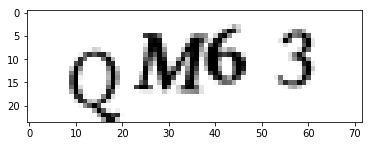

CAPTCHA predicted:QM63


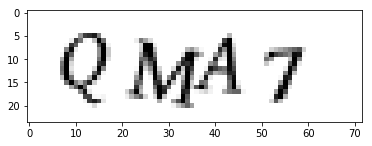

CAPTCHA predicted:QMA7


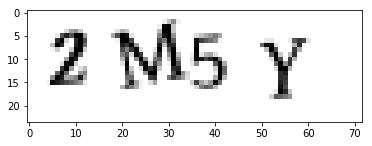

CAPTCHA predicted:2M5Y


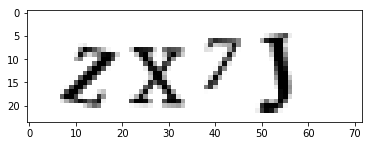

CAPTCHA predicted:ZX7J


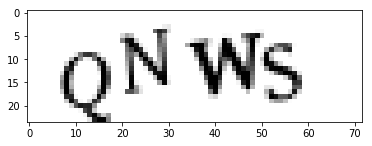

CAPTCHA predicted:QNNNS


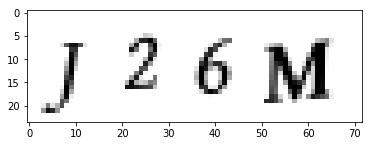

CAPTCHA predicted:J26M


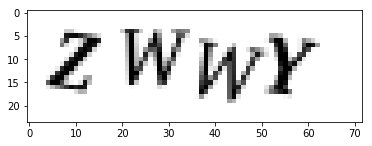

CAPTCHA predicted:ZWWY


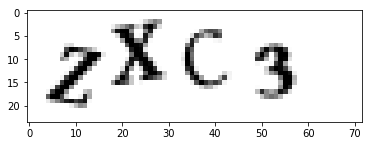

CAPTCHA predicted:ZXC3


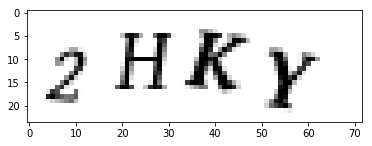

CAPTCHA predicted:2HKY


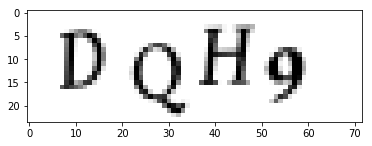

CAPTCHA predicted:DQH9


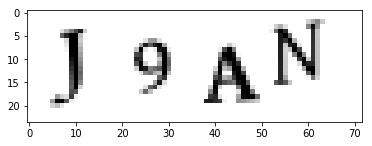

CAPTCHA predicted:J9AN


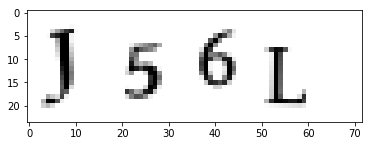

CAPTCHA predicted:J56L


In [3]:
# load label encoding
with open("captcha_label.dat", "rb") as f:
    lb = pickle.load(f)
# load model
captcha_model = load_model("captcha_model.hdf5")
# setting input dir
img_input_dir = os.path.dirname(os.getcwd()) + "/test"
with os.scandir(img_input_dir) as it:
    for f in it:
        if f.name.endswith(".png"):
            solve_captcha(lb, captcha_model, img_input_dir, f.name, show_original = True)